In [77]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Part a
###### $x_0 = 0$
###### $y_0 = 0$
###### ${dx \over dt} = v_x$
###### ${dy \over dt} = v_y$
###### $dv_x = 0$
###### $dv_y = -mg$

In [68]:
x0 = 0
y0 = 0
t0 = 0
tf = 3.5 #seconds
v0 = 300 #m/s
g = 9.8 #gravity #m/s
d = 7.8 #g/cm^3 #density
D = 15 #diameter_cm
G = 0.25 #Gamma #N.s^2/m^4
l = 10000 #lambda #m
A = 50 #angle_in_degrees
a = A*np.pi/180 #angle_rads
r = D/2
p = 1000
T = np.linspace(t0,tf,p)


V = (4/3)*np.pi*(r**3)
m = d*V*1/p

vx0 = v0*np.cos(a)
vy0 = v0*np.sin(a)

IV = [x0,y0,vx0,vy0]

def proj_vac(t,IC):
    x,y,vx,vy = IC
    dx = vx
    dy = vy
    dvx = 0.0
    dvy = -m*g
    return np.array([dx,dy,dvx,dvy])


In [69]:
sol = integrate.solve_ivp(proj_vac,(t0,tf),IV,t_eval=T, method='RK45')
solx = sol.y[0]
soly = sol.y[1]

Horizontal Range is 674.9269901708677


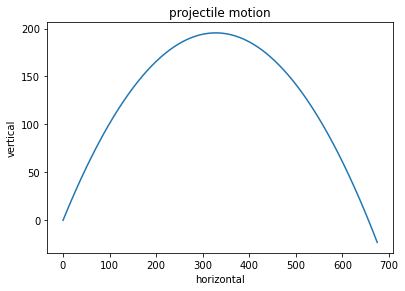

In [70]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_title('projectile motion')
ax.set_xlabel('horizontal')
ax.set_ylabel('vertical')
ax.plot(solx,soly);

hr = solx[-1]
print('Horizontal Range is',hr)

# Part b
##### Runge-Kutta

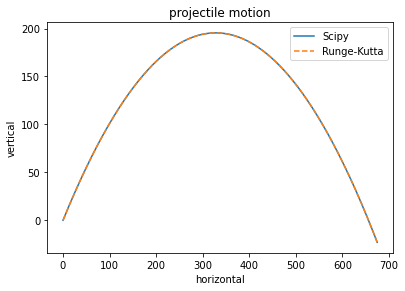

In [76]:
def runge_kutta(func,t,x0):
    n = len(t)
    x = np.zeros((n,len(x0)))
    x[0] = x0
    for i in range(0,n-1):
        dt = t[i+1]-t[i]
        k1 = func(t[i],x[i])
        k2 = func(t[i] + dt/2.0, x[i] + (dt/2.0) *k1)
        k3 = func(t[i] + dt/2.0, x[i] + (dt/2.0)*k2 )
        k4 = func(t[i] + dt, x[i] + dt*k3)
        x[i+1] = x[i] + dt/6*(k1 + (2*k2) + (2*k3) + k4)
    return x

rksol = runge_kutta(proj_vac,T,IV)
rksolx = rksol[:,0]
rksoly = rksol[:,1]
rk_fig = plt.figure()
rk_ax = rk_fig.add_axes([0.1,0.1,0.8,0.8])
rk_ax.set_title('projectile motion')
rk_ax.set_xlabel('horizontal')
rk_ax.set_ylabel('vertical')
rk_ax.plot(solx,soly,label='Scipy');
rk_ax.plot(rksolx,rksoly,'--',label='Runge-Kutta');
rk_ax.legend();

    

###### My Runge Kutta evaluation gives the same result as scipy. the graph shows how each point for the runge kutta aligns with scipy's point. 

# Part c
##### air pressure
###### ${dx \over dt} = v_x$
###### ${dy \over dt} = v_y$
###### ${dv_x \over dt} = f_{dragx}$
###### ${dv_y \over dt} = -mg - f_{dragy}$

In [57]:
c = (G*D**2)/l

def fdragc(v):
    return c*v**2 
    
def fdrag(y,v):
    return c*np.exp(-y/l)*v**2
    
def proj_air(t,IC):
    x,y,vx,vy = IC
    dx = vx
    dy = vy
    dvx = -fdragc(dx)
    dvy = -m*g - fdragc(dy)
    if y < 0:
        return np.zeros(4)
    return np.array([dx,dy,dvx,dvy])

    
    

Horizontal Range is 219.34050179043368


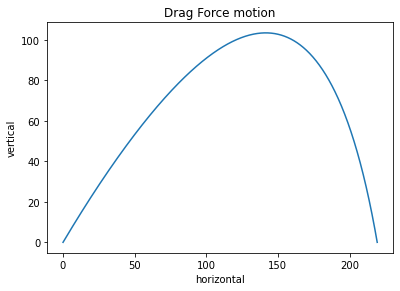

In [58]:
airsol = integrate.solve_ivp(proj_air,(t0,tf),IV, t_eval = T)
airsolx = airsol.y[0]
airsoly = airsol.y[1]

air_fig = plt.figure()
air_ax = air_fig.add_axes([0.1,0.1,0.8,0.8])
air_ax.set_title('Drag Force motion')
air_ax.set_xlabel('horizontal')
air_ax.set_ylabel('vertical')
air_ax.plot(airsolx,airsoly);

print ('Horizontal Range is', airsolx[-1])

# Part D
#### Drag Term
###### ${dx \over dt} = v_x$
###### ${dy \over dt} = v_y$
###### ${dv_x \over dt} = f_{dragx}$
###### ${dv_y \over dt} = -mg - f_{dragy}$

Horizontal Range is 220.24564406411625


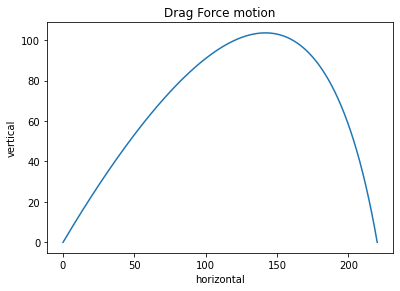

In [59]:
def proj_drag(t,IC):
    x,y,vx,vy = IC
    dx = vx
    dy = vy
    dvx = -fdrag(x,dx)
    dvy = -m*g - fdrag(y,dy)
    if y<0:
        return np.zeros(4)
    return np.array([dx,dy,dvx,dvy])

dragsol = integrate.solve_ivp(proj_drag,(t0,tf),IV, t_eval = T)
dragsolx = dragsol.y[0]
dragsoly = dragsol.y[1]

drag_fig = plt.figure()
drag_ax = drag_fig.add_axes([0.1,0.1,0.8,0.8])
drag_ax.set_title('Drag Force motion')
drag_ax.set_xlabel('horizontal')
drag_ax.set_ylabel('vertical')
drag_ax.plot(dragsolx,dragsoly);

print('Horizontal Range is', dragsolx[-1])


# Part E


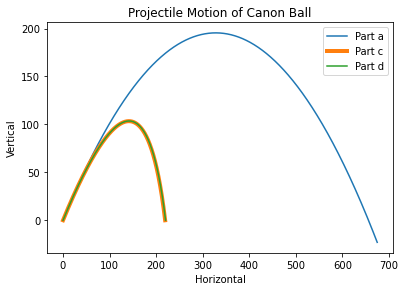

In [75]:
PM_fig = plt.figure()
PM_ax = PM_fig.add_axes([0.1,0.1,0.8,0.8])
PM_ax.set_title('Projectile Motion of Canon Ball')
PM_ax.set_xlabel('Horizontal')
PM_ax.set_ylabel('Vertical')
PM_ax.plot(solx,soly, label='Part a')
PM_ax.plot(airsolx, airsoly, label='Part c', lw=4)
PM_ax.plot(dragsolx, dragsoly, label='Part d')
PM_ax.legend();

###### The air pressure and drag force both impact the motion greatly. Part a curve shows the original motion of the canon ball with no air resisteance or drag force. but when the drag(part d) and air resistance(part c) are added, the horizontal motion seems to decrease by about 500m and the veritcal motion decreases by about 100 m